In [59]:
# covid19 data hub EDA
# データ・クリーニング

# ライブラリ・インポート
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns

In [60]:
# データ・セット保存先ディレクトリ
data_dir = './data/'
dataset = 'covid19dh_jpn.csv'

In [64]:
# データ・セット読み込み
# インデックス: date
df = pd.read_csv(data_dir + dataset, index_col=[1])

In [65]:
df.head()

,id,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,population,...,currency,administrative_area_level,administrative_area_level_1,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key,key_apple_mobility,key_google_mobility
date,,,,,,,,,,,,,,,,,,,,,
2020-01-22,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126529100,...,JPY,1,Japan,NaN,NaN,36.0,138.0,NaN,Japan,JP
2020-01-23,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126529100,...,JPY,1,Japan,NaN,NaN,36.0,138.0,NaN,Japan,JP
2020-01-24,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126529100,...,JPY,1,Japan,NaN,NaN,36.0,138.0,NaN,Japan,JP
2020-01-25,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126529100,...,JPY,1,Japan,NaN,NaN,36.0,138.0,NaN,Japan,JP
2020-01-26,JPN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,126529100,...,JPY,1,Japan,NaN,NaN,36.0,138.0,NaN,Japan,JP


In [66]:
# 基礎統計
df.describe()

,vaccines,tests,confirmed,recovered,deaths,hosp,vent,icu,population,school_closing,...,testing_policy,contact_tracing,stringency_index,iso_numeric,administrative_area_level,administrative_area_level_2,administrative_area_level_3,latitude,longitude,key
count,1.180000e+02,5.140000e+02,511.000000,514.000000,516.000000,513.000000,0.0,504.000000,531.0,528.000000,...,528.000000,528.000000,531.000000,531.0,531.0,0.0,0.0,531.0,531.0,0.0
mean,1.086348e+07,4.585922e+06,231374.939335,203847.167315,4090.490310,18300.265107,NaN,403.992063,126529100.0,1.295455,...,1.539773,1.159091,39.408927,392.0,1.0,NaN,NaN,36.0,138.0,NaN
std,1.343260e+07,4.972132e+06,255622.839395,234583.633081,4500.364432,19650.099479,NaN,363.483833,0.0,0.840065,...,0.498888,0.366108,10.559744,0.0,0.0,NaN,NaN,0.0,0.0,NaN
min,1.250000e+02,0.000000e+00,25.000000,0.000000,0.000000,3.000000,NaN,3.000000,126529100.0,0.000000,...,1.000000,1.000000,2.780000,392.0,1.0,NaN,NaN,36.0,138.0,NaN
25%,1.014582e+06,3.390022e+05,17670.000000,15649.750000,931.000000,4493.000000,NaN,131.000000,126529100.0,1.000000,...,1.000000,1.000000,32.410000,392.0,1.0,NaN,NaN,36.0,138.0,NaN
50%,4.128388e+06,2.473999e+06,95924.000000,86769.500000,1682.500000,11703.000000,NaN,251.500000,126529100.0,1.000000,...,2.000000,1.000000,40.740000,392.0,1.0,NaN,NaN,36.0,138.0,NaN
75%,1.717703e+07,8.128750e+06,432127.500000,406012.250000,7835.250000,25411.000000,NaN,622.250000,126529100.0,1.000000,...,2.000000,1.000000,48.150000,392.0,1.0,NaN,NaN,36.0,138.0,NaN
max,4.624897e+07,1.663800e+07,807413.000000,773110.000000,14865.000000,73562.000000,NaN,1413.000000,126529100.0,3.000000,...,2.000000,2.000000,55.090000,392.0,1.0,NaN,NaN,36.0,138.0,NaN


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531 entries, 2020-01-22 to 2021-07-05
Data columns (total 35 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   531 non-null    object 
 1   vaccines                             118 non-null    float64
 2   tests                                514 non-null    float64
 3   confirmed                            511 non-null    float64
 4   recovered                            514 non-null    float64
 5   deaths                               516 non-null    float64
 6   hosp                                 513 non-null    float64
 7   vent                                 0 non-null      float64
 8   icu                                  504 non-null    float64
 9   population                           531 non-null    int64  
 10  school_closing                       528 non-null    float64
 11  workplace_closing    

In [68]:
# 欠損値の確認
df.isnull().sum()

id                                       0
vaccines                               413
tests                                   17
confirmed                               20
recovered                               17
deaths                                  15
hosp                                    18
vent                                   531
icu                                     27
population                               0
school_closing                           3
workplace_closing                        3
cancel_events                            4
gatherings_restrictions                  3
transport_closing                        3
stay_home_restrictions                   3
internal_movement_restrictions           3
international_movement_restrictions      3
information_campaigns                    3
testing_policy                           3
contact_tracing                          3
stringency_index                         0
iso_alpha_3                              0
iso_alpha_2

In [69]:
# csv書き込み
# df.to_csv(data_dir + 'covid19_tokyo.csv', index=False)

<AxesSubplot:xlabel='date', ylabel='tests'>

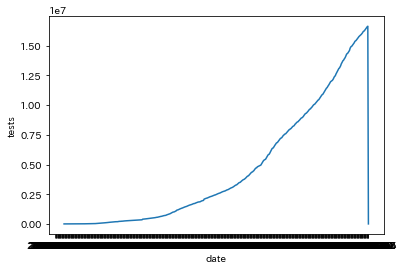

In [80]:
# plot
# PCR検査の推移
sns.lineplot(data=df, x='date', y='tests')

<AxesSubplot:xlabel='date', ylabel='confirmed'>

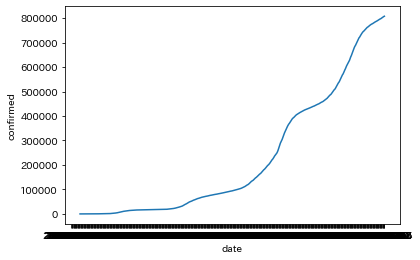

In [73]:
# plot
# 感染者の推移
sns.lineplot(data=df, x='date', y='confirmed')

<AxesSubplot:xlabel='date', ylabel='recovered'>

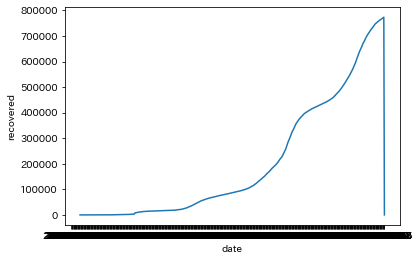

In [75]:
# 回復者の推移
sns.lineplot(data=df, x='date', y='recovered')

<AxesSubplot:xlabel='date', ylabel='icu'>

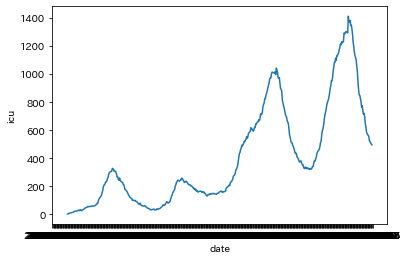

In [76]:
# icuの推移
sns.lineplot(data=df, x='date', y='icu')

<AxesSubplot:xlabel='date', ylabel='deaths'>

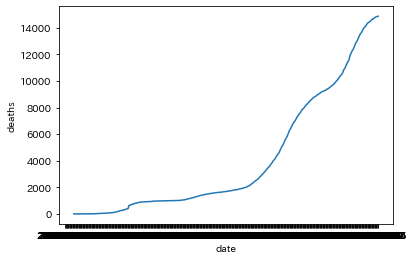

In [79]:
# 死亡者の推移
sns.lineplot(data=df, x='date', y='deaths')

<AxesSubplot:xlabel='date', ylabel='hosp'>

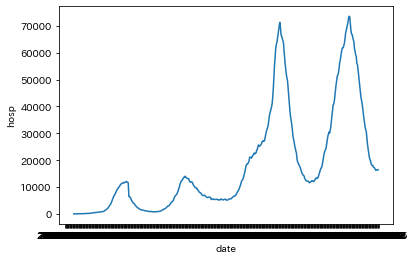

In [78]:
# hospの推移
sns.lineplot(data=df, x='date', y='hosp')

<AxesSubplot:xlabel='date', ylabel='stay_home_restrictions'>

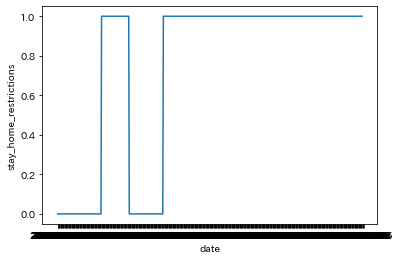

In [77]:
# stay home restrictionsの推移
sns.lineplot(data=df, x='date', y='stay_home_restrictions')

<AxesSubplot:xlabel='date', ylabel='vaccines'>

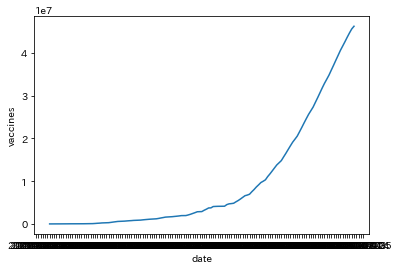

In [74]:
# ワクチン接種の推移
sns.lineplot(data=df, x='date', y='vaccines')

<AxesSubplot:xlabel='date', ylabel='recovered'>

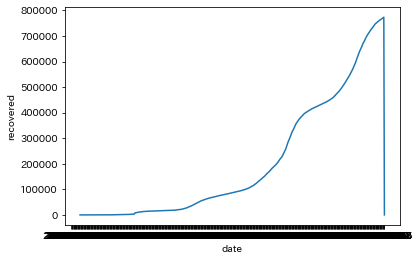

In [92]:
df['administrative_area_level'].sort_index()

date
2020-01-22    1
2020-01-23    1
2020-01-24    1
2020-01-25    1
2020-01-26    1
             ..
2021-07-01    1
2021-07-02    1
2021-07-03    1
2021-07-04    1
2021-07-05    1
Name: administrative_area_level, Length: 531, dtype: int64

In [ ]:
sort_index